In [32]:
from nltk.corpus import wordnet
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
print(wordnet.synsets('man'))


[Synset('man.n.01'), Synset('serviceman.n.01'), Synset('man.n.03'), Synset('homo.n.02'), Synset('man.n.05'), Synset('man.n.06'), Synset('valet.n.01'), Synset('man.n.08'), Synset('man.n.09'), Synset('man.n.10'), Synset('world.n.08'), Synset('man.v.01'), Synset('man.v.02')]


In [26]:
man = wordnet.synset('man.n.01')
print(man.definition())
print(man.hypernym_paths())

an adult person who is male (as opposed to a woman)
[[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('adult.n.01'), Synset('man.n.01')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('person.n.01'), Synset('adult.n.01'), Synset('man.n.01')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('male.n.02'), Synset('man.n.01')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('person.n.01'), Synset('male.n.02'), Synset('man.n.01')]]


In [28]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    def recurse(x):
        if not x in seen:
            seen.add(x)
            graph.add_node(x.name)
            for x1 in fn(x):
                graph.add_node(x1.name)
                graph.add_edge(x.name, x1.name)
                recurse(x1)
    recurse(synset)
    return graph

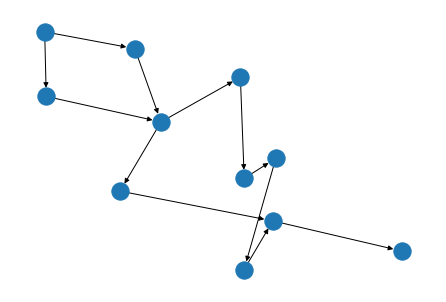

In [42]:
graph = closure_graph(man, lambda x: x.hypernyms())
nx.draw(graph)